In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
#train = pd.read_csv("data/train.csv",sep =",") 
train = pd.read_csv("data/train_cut.csv",sep =",")
print(train.shape)
train.head()

(57897, 129)


,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1.536897e+09,37.807800,-87.685699,19.0,0.0,mild temperate,117.0,-34.127495,22.755714,752.813186,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.499939,18.350031,0.0,0.0
1,1.538169e+09,33.630000,-83.850000,27.0,0.0,mild temperate,243.0,29.063373,24.312143,742.794590,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.595581,20.845575,0.0,0.0
2,1.553684e+09,-41.327202,174.804993,17.0,10.0,mild temperate,16.0,-47.358477,15.566429,758.947841,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.496002,14.253992,0.0,0.0
3,1.548590e+09,52.457222,5.519722,5.0,20.0,mild temperate,-5.0,19.261083,3.930000,760.253020,...,0.0,0.61675,0.0,0.137579,0.0,0.0,0.399994,5.249994,63.0,98.0
4,1.548698e+09,34.228889,135.164167,5.0,10.0,mild temperate,7.0,-46.665545,4.299286,754.940419,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.953400,-3.150000,21.0,100.0


In [3]:
#train = train.sample(frac=0.25, replace=True, random_state=1)
#train.shape

In [4]:
#devin = pd.read_csv("data/dev_in.csv",sep =",") 
#print(devin.shape)
#devin.head()

In [5]:
#devout = pd.read_csv("data/dev_out.csv",sep =",") 
#print(devout.shape)

In [6]:
#train5 = train.sample(frac=0.50, replace=True, random_state=1)
#train5.shape

# Drop the unused metadata and the 'wrf_hail' column

In [3]:
#drop cols 0:3 and 4:6
cols = [0,1,2,4,5]
print("# cols before any drops = ",train.shape[1])
train.drop(train.columns[cols], axis=1,inplace=True)
print("# cols after first drops = ",train.shape[1])
train.drop(['wrf_hail'], axis=1,inplace=True)
print("# cols after second drop = ",train.shape[1])
train.head()

# cols before any drops =  129
# cols after first drops =  124
# cols after second drop =  123


,fact_temperature,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,19.0,117.0,-34.127495,22.755714,752.813186,298.371802,-2.232373,294.931836,292.699463,294.931836,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.499939,18.350031,0.0,0.0
1,27.0,243.0,29.063373,24.312143,742.794590,300.232275,-3.058936,299.856152,296.797217,299.856152,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.595581,20.845575,0.0,0.0
2,17.0,16.0,-47.358477,15.566429,758.947841,291.129443,-1.238599,289.352051,288.939185,290.177783,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.496002,14.253992,0.0,0.0
3,5.0,-5.0,19.261083,3.930000,760.253020,280.317310,-0.523193,279.665039,279.141846,279.665039,...,0.0,0.61675,0.0,0.137579,0.0,0.0,0.399994,5.249994,63.0,98.0
4,5.0,7.0,-46.665545,4.299286,754.940419,278.389185,-0.714307,277.622803,276.908496,277.622803,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.953400,-3.150000,21.0,100.0


# Drop all rows with missing data as missingness is at random

In [4]:
# Find all rows with nulls and remove
s1 = train.shape[0]
train = train.dropna()
s2 = train.shape[0]
print("number of rows before removing nulls = ",s1)
print("number of rows after removing nulls = ",s2)
print("percent of rows dropped from nulls = ",(s1-s2)/s1*100,"%")
train.shape

number of rows before removing nulls =  57897
number of rows after removing nulls =  54831
percent of rows dropped from nulls =  5.295611171563293 %


(54831, 123)

In [5]:
train.head()

,fact_temperature,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,19.0,117.0,-34.127495,22.755714,752.813186,298.371802,-2.232373,294.931836,292.699463,294.931836,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.499939,18.350031,0.0,0.0
1,27.0,243.0,29.063373,24.312143,742.794590,300.232275,-3.058936,299.856152,296.797217,299.856152,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.595581,20.845575,0.0,0.0
2,17.0,16.0,-47.358477,15.566429,758.947841,291.129443,-1.238599,289.352051,288.939185,290.177783,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.496002,14.253992,0.0,0.0
3,5.0,-5.0,19.261083,3.930000,760.253020,280.317310,-0.523193,279.665039,279.141846,279.665039,...,0.0,0.61675,0.0,0.137579,0.0,0.0,0.399994,5.249994,63.0,98.0
4,5.0,7.0,-46.665545,4.299286,754.940419,278.389185,-0.714307,277.622803,276.908496,277.622803,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.953400,-3.150000,21.0,100.0


In [6]:
#define predictor and response variables
trainX = train.iloc[:,1:]
trainY = train.iloc[:,0]
print(trainX .shape)
print(trainY .shape)

(54831, 122)
(54831,)


In [7]:
trainX.head()

,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,cmc_0_0_0_500,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,117.0,-34.127495,22.755714,752.813186,298.371802,-2.232373,294.931836,292.699463,294.931836,267.108789,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.499939,18.350031,0.0,0.0
1,243.0,29.063373,24.312143,742.794590,300.232275,-3.058936,299.856152,296.797217,299.856152,265.124927,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.595581,20.845575,0.0,0.0
2,16.0,-47.358477,15.566429,758.947841,291.129443,-1.238599,289.352051,288.939185,290.177783,258.982837,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.496002,14.253992,0.0,0.0
3,-5.0,19.261083,3.930000,760.253020,280.317310,-0.523193,279.665039,279.141846,279.665039,242.059961,...,0.0,0.61675,0.0,0.137579,0.0,0.0,0.399994,5.249994,63.0,98.0
4,7.0,-46.665545,4.299286,754.940419,278.389185,-0.714307,277.622803,276.908496,277.622803,250.534521,...,0.0,0.00000,0.0,0.000000,0.0,0.0,-0.953400,-3.150000,21.0,100.0


Because there is so much co-linearity I will do PCA regression

In [8]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
#scale predictor variables and get PCs
pca = PCA()
X_reduced = pca.fit_transform(scale(trainX)) # convert a (2965544, 122) scaled array into (2965544, 122) PC array


Text(0, 0.5, 'MSE')

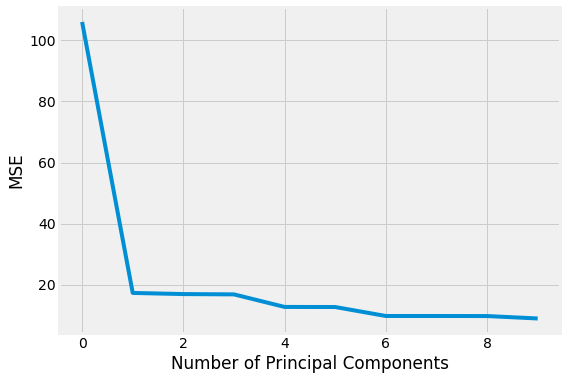

In [10]:
#define cross validation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), trainY, cv=cv, # need an array of ones the length of X_reduced
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1,10):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], trainY, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
#x1,x2,y1,y2 = plt.axis()  
#plt.axis((x1,x2,5,50))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')

For the full train set, the minimum value of MSE occurs at 7 PCs.  So this is how many we will pick for the model.  

In [11]:
# percentage of variance in the response variable explained by adding in each principal component
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([30.13, 38.79, 45.11, 50.04, 54.12, 57.59, 60.09, 62.47, 64.71,
       66.59, 68.42, 70.18, 71.87, 73.5 , 75.06, 76.5 , 77.85, 79.18,
       80.35, 81.42, 82.44, 83.39, 84.23, 85.04, 85.84, 86.62, 87.39,
       88.13, 88.86, 89.56, 90.26, 90.94, 91.57, 92.13, 92.68, 93.2 ,
       93.7 , 94.14, 94.55, 94.93, 95.27, 95.61, 95.93, 96.25, 96.55,
       96.8 , 97.04, 97.27, 97.48, 97.67, 97.84, 98.01, 98.16, 98.3 ,
       98.44, 98.57, 98.69, 98.81, 98.92, 99.01, 99.1 , 99.19, 99.27,
       99.35, 99.42, 99.48, 99.54, 99.59, 99.63, 99.67, 99.7 , 99.73,
       99.76, 99.78, 99.8 , 99.82, 99.84, 99.86, 99.88, 99.9 , 99.91,
       99.92, 99.93, 99.94, 99.95, 99.96, 99.97, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98])

In [12]:
regr1 = LinearRegression()
regr.fit(X_reduced[:,:8], trainY)
Ypred = regr.predict(X_reduced[:,:8])
len(Ypred)/len(trainY)
print("MSE of Ypred and trainY of full model on Trainins set is  = ",mean_squared_error(Ypred, trainY))

MSE of Ypred and trainY of full model on Trainins set is  =  9.780777344494068


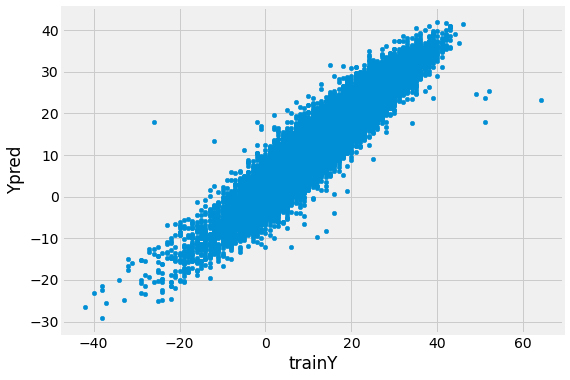

In [13]:
#plot Ypred vs. trainY
df_Y = pd.DataFrame({'Ypred':Ypred, 'trainY':trainY})
df_Y.plot(kind = "scatter", x = 'trainY',y = 'Ypred');

# Now predict for devin and calc MSE

In [14]:
devin = pd.read_csv("data/dev_in.csv",sep =",") 
print(devin.shape)
devin.head()

(50000, 129)


,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1539162000,-40.350000,-9.880000,11.0,10,tropical,-843.0,31.782490,10.070714,765.631228,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.505035,2.647577,2.0,2.0
1,1545006600,53.421299,-6.270070,4.0,10,mild temperate,67.0,-59.691521,7.005000,752.897615,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,-0.400024,1.249994,0.0,0.0
2,1540094400,-19.757700,63.361000,26.0,10,dry,6.0,35.250889,23.327143,763.115016,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.100006,21.050012,-1.0,1.0
3,1552611600,35.245899,47.009201,5.0,10,mild temperate,1390.0,-23.755615,3.109286,609.419333,...,1.69672,5.1653,0.0,0.000049,0.0,0.0,-1.500000,-0.349982,-12.0,81.0
4,1545631200,26.633333,118.150000,14.0,20,mild temperate,210.0,33.040438,12.172143,734.678037,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.102081,11.513879,-15.0,83.0


In [15]:
#drop cols 0:3 and 4:6
cols = [0,1,2,4,5]
print("# cols before any drops = ",devin.shape[1])
devin.drop(devin.columns[cols], axis=1,inplace=True)
print("# cols after first drops = ",devin.shape[1])
devin.drop(['wrf_hail'], axis=1,inplace=True)
print("# cols after second drop = ",devin.shape[1])
devin.head()

# cols before any drops =  129
# cols after first drops =  124
# cols after second drop =  123


,fact_temperature,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,11.0,-843.0,31.782490,10.070714,765.631228,282.619775,0.426294,284.084521,284.510815,284.084521,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.505035,2.647577,2.0,2.0
1,4.0,67.0,-59.691521,7.005000,752.897615,279.546143,-0.734399,277.743530,277.009131,277.743530,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,-0.400024,1.249994,0.0,0.0
2,26.0,6.0,35.250889,23.327143,763.115016,295.376318,0.137329,296.955811,297.047363,296.910034,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.100006,21.050012,-1.0,1.0
3,5.0,1390.0,-23.755615,3.109286,609.419333,284.379980,-0.461279,273.738379,273.430859,273.892139,...,1.69672,5.1653,0.0,0.000049,0.0,0.0,-1.500000,-0.349982,-12.0,81.0
4,14.0,210.0,33.040438,12.172143,734.678037,285.636035,-0.637793,286.726367,286.088574,286.726367,...,0.00000,0.0000,0.0,0.000000,0.0,0.0,0.102081,11.513879,-15.0,83.0


In [16]:
# Check for nulls
# Find all rows with nulls and remove
s1 = devin.shape[0]
devin = devin.dropna()
s2 = devin.shape[0]
print("number of rows before removing nulls = ",s1)
print("number of rows after removing nulls = ",s2)
print("percent of rows dropped from nulls = ",(s1-s2)/s1*100,"%")
devin.shape

number of rows before removing nulls =  50000
number of rows after removing nulls =  47373
percent of rows dropped from nulls =  5.2540000000000004 %


(47373, 123)

In [17]:
devinX = devin.iloc[:,1:]
devinY = devin.iloc[:,0]
print(devinX .shape)
print(devinY .shape)

(47373, 122)
(47373,)


In [18]:
pca = PCA()
devinX_r = pca.fit_transform(scale(devinX)) # convert a (2965544, 122) scaled array into (2965544, 122) PCA array


In [19]:
Devinpred = regr.predict(devinX_r[:,:8])
len(Devinpred)/len(devinY)
print("MSE of Devinpred and devinY of full model on Trainins set is  = ",mean_squared_error(Devinpred, devinY))

MSE of Devinpred and devinY of full model on Trainins set is  =  9.839737889532367


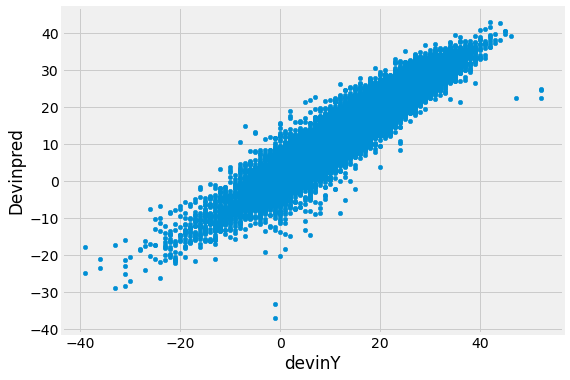

In [20]:
#plot Ypred vs. trainY
df_devinY = pd.DataFrame({'Devinpred':Devinpred, 'devinY':devinY})
df_devinY.plot(kind = "scatter", x = 'devinY',y = 'Devinpred');

# Now predict for devout and calc MSE

In [21]:
devout = pd.read_csv("data/dev_out.csv",sep =",") 
print(devout.shape)
devout.head()

(50000, 129)


,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1563124500,42.614899,-89.590401,28.0,0,snow,313.0,65.438862,19.171429,737.750555,...,0.0,0.0,0.0,0.0,0.0,0.0,2.399994,23.450006,26.0,71.0
1,1565951400,61.885201,34.154701,18.0,10,snow,34.0,40.277528,15.127857,751.846067,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.300018,9.449976,21.0,40.0
2,1563850200,38.468201,43.332298,17.0,10,snow,1652.0,-0.237116,20.117857,609.203551,...,0.0,0.0,0.0,0.0,0.0,0.0,1.849335,3.365320,0.0,0.0
3,1562806380,38.791000,-97.652199,28.0,0,snow,383.0,19.207866,33.193571,724.725255,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.486816,16.263177,0.0,0.0
4,1564509600,58.767200,-111.116997,20.0,20,snow,235.0,46.174496,19.481429,740.954837,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.200012,7.050012,-1.0,5.0


In [22]:
#drop cols 0:3 and 4:6
cols = [0,1,2,4,5]
print("# cols before any drops = ",devout.shape[1])
devout.drop(devout.columns[cols], axis=1,inplace=True)
print("# cols after first drops = ",devout.shape[1])
devout.drop(['wrf_hail'], axis=1,inplace=True)
print("# cols after second drop = ",devout.shape[1])
devout.head()

# cols before any drops =  129
# cols after first drops =  124
# cols after second drop =  123


,fact_temperature,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,cmc_0_0_0_1000,cmc_0_0_0_2_grad,cmc_0_0_0_2_interpolated,cmc_0_0_0_2_next,cmc_0_0_0_2,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,28.0,313.0,65.438862,19.171429,737.750555,298.114404,3.482544,300.603483,301.764331,298.281787,...,0.0,0.0,0.0,0.0,0.0,0.0,2.399994,23.450006,26.0,71.0
1,18.0,34.0,40.277528,15.127857,751.846067,289.922168,0.461267,291.023409,291.330920,290.869653,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.300018,9.449976,21.0,40.0
2,17.0,1652.0,-0.237116,20.117857,609.203551,301.351074,-0.192773,291.672510,291.608252,291.801025,...,0.0,0.0,0.0,0.0,0.0,0.0,1.849335,3.365320,0.0,0.0
3,28.0,383.0,19.207866,33.193571,724.725255,306.146948,-4.270203,303.320825,299.050623,303.320825,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.486816,16.263177,0.0,0.0
4,20.0,235.0,46.174496,19.481429,740.954837,294.056982,1.473193,294.807349,296.280542,294.807349,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.200012,7.050012,-1.0,5.0


In [23]:
# Check for nulls
# Find all rows with nulls and remove
s1 = devout.shape[0]
devout = devout.dropna()
s2 = devout.shape[0]
print("number of rows before removing nulls = ",s1)
print("number of rows after removing nulls = ",s2)
print("percent of rows dropped from nulls = ",(s1-s2)/s1*100,"%")
devout.shape

number of rows before removing nulls =  50000
number of rows after removing nulls =  45692
percent of rows dropped from nulls =  8.616 %


(45692, 123)

In [24]:
devoutX = devout.iloc[:,1:]
devoutY = devout.iloc[:,0]
print(devoutX .shape)
print(devoutY .shape)

(45692, 122)
(45692,)


In [25]:
pca = PCA()
devoutX_r = pca.fit_transform(scale(devoutX)) # convert a (2965544, 122) scaled array into (2965544, 122) PCA array


In [26]:
Devoutpred = regr.predict(devoutX_r[:,:8])
len(Devoutpred)/len(devoutY)
print("MSE of Devoutpred and devoutY of full model on Trainins set is  = ",mean_squared_error(Devoutpred, devoutY))

MSE of Devoutpred and devoutY of full model on Trainins set is  =  56.270187566085085


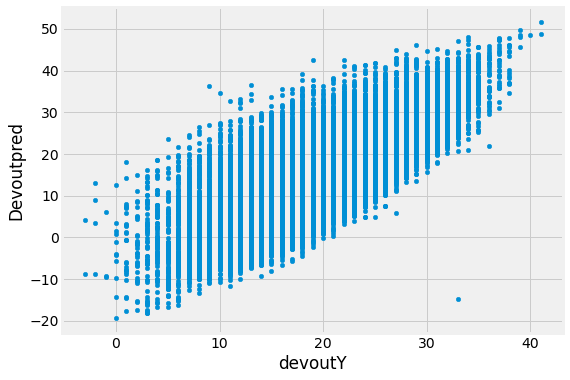

In [27]:
#plot Ypred vs. trainY
df_devoutY = pd.DataFrame({'Devoutpred':Devoutpred, 'devoutY':devoutY})
df_devoutY.plot(kind = "scatter", x = 'devoutY',y = 'Devoutpred');

Conclusion on PCR:  PCR is not a very good model for dealing with outside of distribution data.  Also, in the training step we saw that the MSE went up a lot after 7 PCs. But only about 59% of the of variance in the response variable explained by the first 7 PCs.  It may be better to try a model that does not have the restriction of colinearity that linear regression does and hence can account for the variance in the measurement from different experiments better. 

# Next steps will be to do 
XGBOOST,
various imputation approaches instead of deleteing the missing data,
Deep learning model